In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [31]:
!pip list

Package                            Version  
---------------------------------- ---------
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.3    
asn1crypto                         1.0.1    
astroid                            2.2.5    
astropy                            3.2.1    
atomicwrites                       1.3.0    
attrs                              19.2.0   
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.5      
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifulsoup4                     4.8.0    
bitarray                           1.0.1    
bkcharts                           0.2      
bleach                             3.1.0    
bokeh     

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
files = [file for file in os.listdir("./Sales_Data") if not file.startswith('.')]
year_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data"+"/"+file)
    year_data = pd.concat([year_data,df])
year_data.to_csv("all_data.csv",index=False)

In [4]:
year_data =pd.read_csv("all_data.csv")
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
# Clean the data from NaN values
NaN_df = year_data[year_data.isna().any(axis=1)]
NaN_df.head()
year_data = year_data.dropna(how='all')


In [6]:
#Remove the rows with deprycated order date
year_data = year_data[year_data['Order Date'].str[0:2] != "Or"]

In [7]:
# add a month coulmn
year_data['Month'] = year_data['Order Date'].str[0:2]
year_data['Month'] = year_data['Month'].astype('int32')
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [8]:
year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered'])
year_data['Price Each'] = pd.to_numeric(year_data['Price Each'])

In [9]:
# add a sales coulmn
year_data['Sales'] = year_data['Quantity Ordered'] * year_data['Price Each']
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [14]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

year_data['City'] = year_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [11]:
# get the best month of sales
sales_sum_by_month = year_data.groupby('Month').sum()

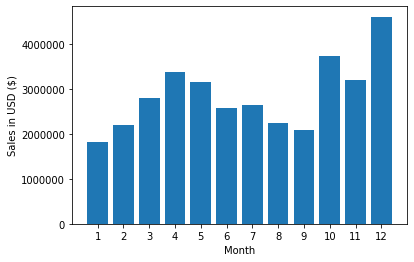

In [12]:
# plot the sales ber month
months= range(1,13)
plt.bar(months,sales_sum_by_month['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.show()

In [21]:
# get the highest city in cales
sales_sum_by_city= year_data.groupby('City').sum()
sales_sum_by_city


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


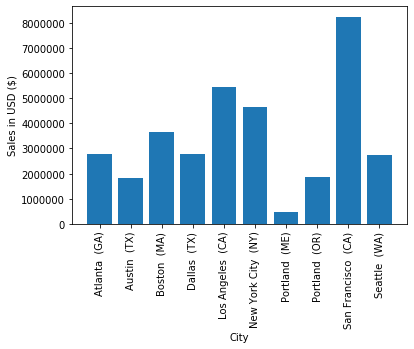

In [24]:
cities = [city for city, df in year_data.groupby(['City'])]

plt.bar(cities,sales_sum_by_city['Sales'])
plt.xticks(cities,rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.show()

In [27]:
# best time to display ads
year_data['Hour'] = pd.to_datetime(year_data['Order Date']).dt.hour
year_data['Minute'] = pd.to_datetime(year_data['Order Date']).dt.minute
year_data['Count'] = 1

year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


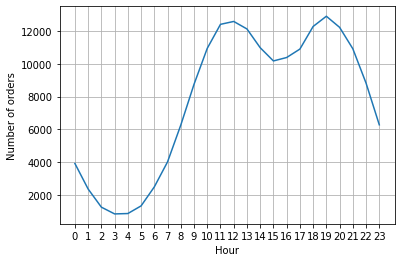

In [29]:
hours = [hour for hour, df in year_data.groupby(['Hour'])]

plt.plot(hours, year_data.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()
plt.show()

In [30]:
# products that probably soled together
df = year_data[year_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [33]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


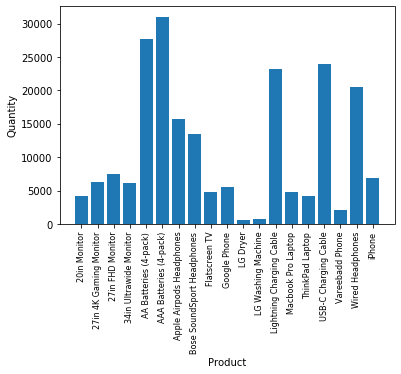

In [35]:
# products that sold the most
product_group = year_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

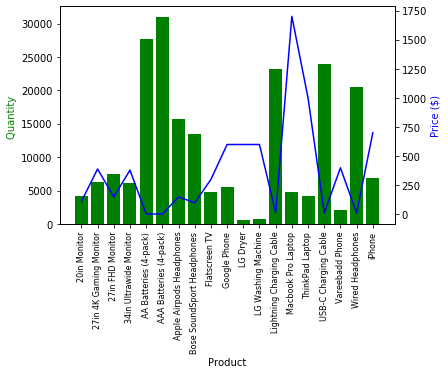

In [36]:
prices = year_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity ', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()